# Load dataset

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report, roc_curve, roc_auc_score

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# exploratory Data Analysis

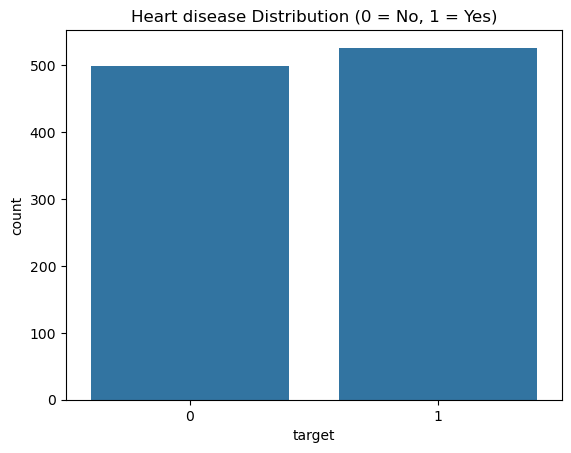

In [10]:
sns.countplot(x ="target" , data = df)
plt.title("Heart disease Distribution (0 = No, 1 = Yes)")
plt.show()

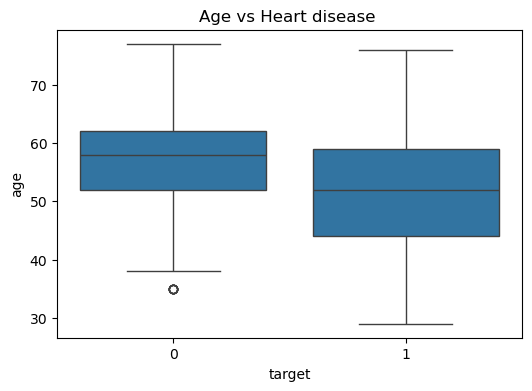

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="target", y="age", data=df)
plt.title("Age vs Heart disease ")
plt.show()

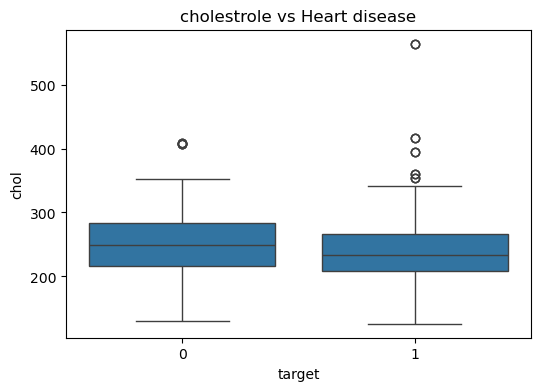

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="target", y="chol", data=df)
plt.title("cholestrole vs Heart disease")
plt.show()

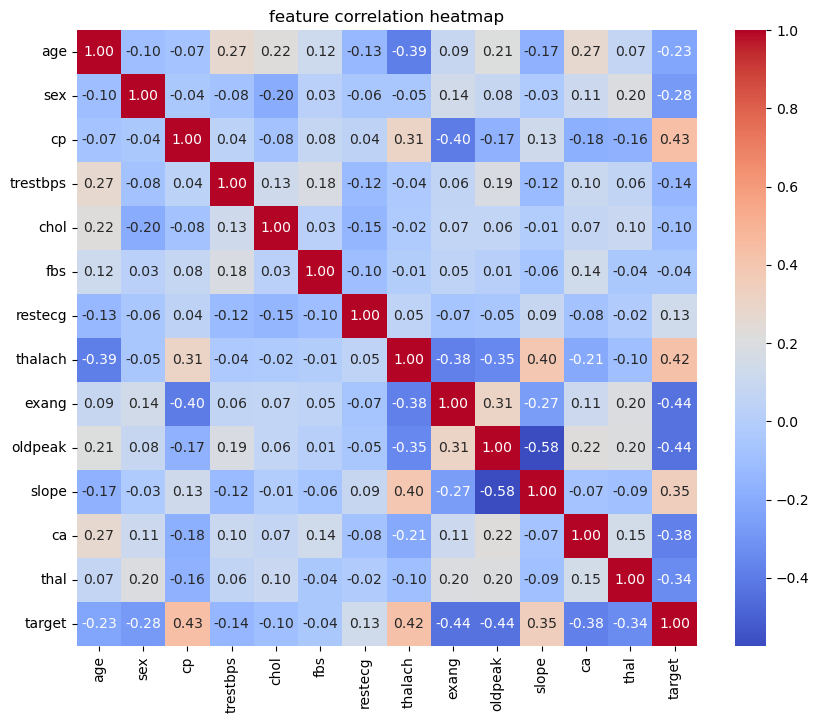

In [18]:
# correlation 
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("feature correlation heatmap")
plt.show()

# Feature Selection

In [21]:
X = df.drop("target", axis=1)
y=df["target"]

# Train Test Split

In [28]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling

In [29]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train classification model (Logistic Regression)

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Prediction

In [31]:
y_pred = model.predict(X_test)
y_Prob = model.predict_proba(X_test)[:,1]

# Model Evaluation

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8051948051948052


# Confusion matrix

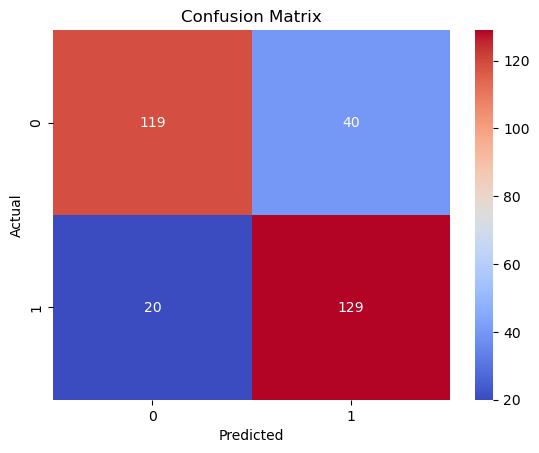

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Roc Auc Curve

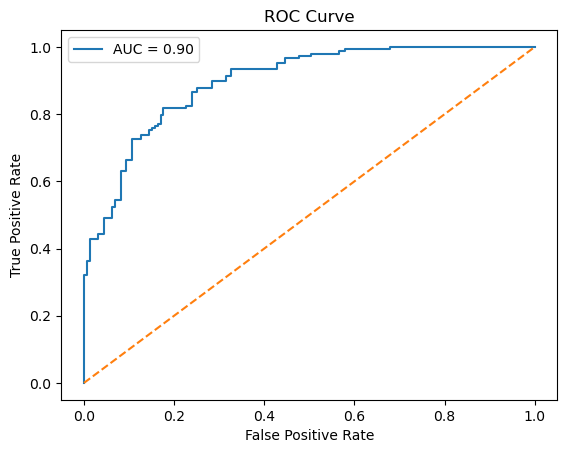

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_Prob)
auc_score = roc_auc_score(y_test, y_Prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# Feature Importance Analysis

In [39]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_[0]
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
2,cp,0.891944
7,thalach,0.609247
10,slope,0.365204
6,restecg,0.120819
0,age,-0.000683
5,fbs,-0.081407
3,trestbps,-0.279433
8,exang,-0.369342
4,chol,-0.566709
12,thal,-0.612557


# Train Model using Random Forest

In [55]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [56]:
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.transform(X_test_rf)

In [57]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(n_estimators=200, random_state=42)

In [63]:
y_pred_rf = rf_model.predict(X_test_rf)
y_prob_rf = rf_model.predict_proba(X_test_rf)[:,1]

In [64]:
print("random Forest accuracy", accuracy_score(y_test_rf, y_pred_rf))

random Forest accuracy 0.970873786407767


In [65]:
print("classification Report", classification_report(y_test_rf, y_pred_rf))

classification Report               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103



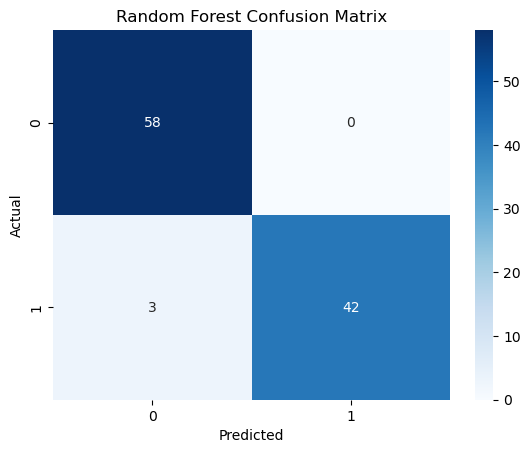

In [68]:
cm = confusion_matrix(y_test_rf, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


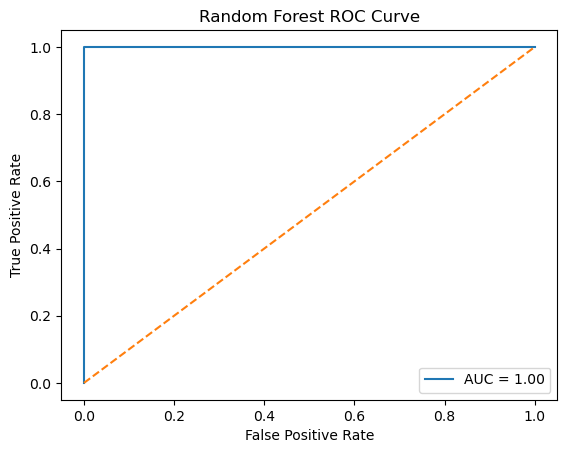

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test_rf, y_prob_rf)
auc_score = roc_auc_score(y_test_rf, y_prob_rf)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()


In [72]:
import joblib
joblib.dump(rf_model, "Heart_Disease_rf_model.pkl")

['Heart_Disease_rf_model.pkl']